<a href="https://colab.research.google.com/github/Murolando/NOA_EGE_analytics/blob/main/Analysis_of_EGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Анализ данных результатов ЕГЭ по информатике,  в РСО - Алании, за 2019-2021 года.

In [99]:
df_21_inf = pd.read_excel('/content/drive/MyDrive/Ege Banditi/Rez_EGE.xlsx',sheet_name=2)

In [100]:
df_20_inf = pd.read_excel('/content/drive/MyDrive/Ege Banditi/Rez_EGE.xlsx',sheet_name=4)

In [101]:
df_19_inf = pd.read_excel('/content/drive/MyDrive/Ege Banditi/Rez_EGE.xlsx',sheet_name=6)

In [102]:
df_21_inf.head()

,МСУ,Код предмета,ППЭ,ОО,Вариант,В,С,Первич,100.0,Дата,...,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0
0,100.0,25.0,141.0,301148.0,327.0,+++-++--+---+--+--------000,NaN,8.0,45.0,2021-06-24,...,-,-,-,-,-,-,-,0.0,0.0,0.0
1,100.0,25.0,170.0,301138.0,325.0,+++++++++++++++++++-++--200,NaN,23.0,83.0,2021-06-24,...,+,+,-,+,+,-,-,2.0,0.0,0.0
2,200.0,25.0,301.0,301203.0,363.0,++------+---------+-----000,NaN,4.0,27.0,2021-06-25,...,-,+,-,-,-,-,-,0.0,0.0,0.0
3,1.0,25.0,170.0,201801.0,504.0,+-++++++-----++-+-++--+-000,NaN,13.0,58.0,2021-07-02,...,-,+,+,-,-,+,-,0.0,0.0,0.0
4,1.0,25.0,128.0,201808.0,366.0,+----+-++++++++++++--++-000,NaN,16.0,65.0,2021-06-25,...,+,+,-,-,+,+,-,0.0,0.0,0.0


In [103]:
df_20_inf.head()

,МСУ,Код предмета,ППЭ,ОО,Вариант,В,С,Первич,100.0,Дата,Аудитория,Место,OB3,Пол,Район,Кратое название ОУ
0,700.0,5.0,708.0,301708.0,342.0,+-+++++++-+-+++--------,3(3)0(2)3(3)0(4),18.0,62.0,2020-07-03,1.0,2:А,0.0,0.0,Моздокский район,МБОУ СОШ №8 г.Моздок
1,700.0,5.0,708.0,301708.0,340.0,++++-+++--+---+-++++---,3(3)2(2)3(3)3(4),24.0,73.0,2020-07-03,1.0,4:А,0.0,0.0,Моздокский район,МБОУ СОШ №8 г.Моздок
2,700.0,5.0,708.0,302701.0,343.0,----+++++-+++++-++-----,3(3)2(2)1(3)2(4),20.0,66.0,2020-07-03,1.0,1:В,0.0,0.0,Моздокский район,МБОУ СОШ №1 г.Моздок с угл. изуч. англ. языка
3,400.0,5.0,142.0,301402.0,342.0,++-+++++--------+------,0(3)0(2)0(3)0(4),8.0,44.0,2020-07-03,5.0,1:А,0.0,0.0,Дигорский район,МКОУ СОШ №2 г.Дигора
4,100.0,5.0,114.0,301138.0,106.0,+-+-+--+++++++--++---+-,3(3)2(2)2(3)0(4),20.0,66.0,2020-07-24,3.0,1:В,0.0,0.0,г. Владикавказ,МБОУ СОШ №38


In [104]:
df_19_inf.head()

,МСУ,Код предмета,ППЭ,ОО,Вариант,В,С,Первич,100.0,Дата,Аудитория,Место,OB3,Пол,Регион,Кратое название ОУ
0,1.0,5.0,801.0,201808.0,338.0,+++-++++++++-++++-+-+--,3(3)2(2)3(3)2(4),27.0,79.0,2019-06-13,11.0,3:А,0.0,1.0,Правобережный район,ГБОУ СОШ №8 г.Беслан
1,700.0,5.0,709.0,301716.0,334.0,-----------------------,0(3)0(2)0(3)0(4),0.0,0.0,2019-06-13,2.0,3:А,0.0,0.0,Моздокский район,МБОУ СОШ №2 с.Кизляр
2,300.0,5.0,301.0,301302.0,335.0,++++++-+++--+-++-----+-,0(3)0(2)0(3)0(4),13.0,53.0,2019-06-13,2.0,1:Б,0.0,0.0,Ардонский район,МБОУ СОШ №2 г.Ардон
3,100.0,5.0,147.0,301144.0,504.0,+-+++-++----+-----+----,1(3)0(2)1(3)0(4),10.0,48.0,2019-06-20,11.0,2:А,0.0,1.0,г. Владикавказ,МБОУ СОМШ №44
4,100.0,5.0,147.0,301130.0,334.0,+-++-++++++++-+++-+++-+,3(3)2(2)3(3)1(4),27.0,79.0,2019-06-13,3.0,4:А,0.0,0.0,г. Владикавказ,МБОУ СОШ №30


# Описание набора данных

## Переменная(признак)- Описание переменной - Тип переменной


⭕ **МСУ** - Номер местного самоуправления - Категориальная

⭕ **Код предмета** - Код Экзамена по информатике - Категориальная

⭕ **ППЭ** - Номер пункта проведения Экзамена - Категориальная

⭕ **ОО** - Номер образовательной организации - Категориальная

⭕ **Вариант** - Номер варианта - Категориальная

⭕ **В** - Проверенные ответа каждого из учеников в части B (+ правильный ответ, -неправильный ответ) - Категориальная

⭕ **C** - Количество баллов за ответ каждого из учеников в части С - Категориальная

⭕ **Первич** - Количество первичных баллов за весь экзамен - Количественная

⭕ **100** - Количество вторичных баллов за весь экзамен - Количественная

⭕ **Дата** - Дата проведения экзамена - Дата

⭕ **Аудитория** - Номер аудитории, где ученик сдавал экзамен - Категориальная

⭕ **Место** - Номер места, за которым сидел ученик во время сдачи экзамена - Категориальная

⭕ **OB3** - Является ли у ученик лицом с ограниченными возможностями здоровья (0 - нет, 1 - да) - Категориальная

⭕ **Пол** - Пол учащегося (0 – мужской, 1 – женский) -Категориальная



# Разные функции

In [105]:
# Для очистки мусора
def clear_from_rubb(data):
    if df_21_inf.shape[1] > 15:
      data.drop(columns = ['С',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],inplace = True,axis = 1)
    data = data.dropna(how='any',axis = 0,inplace = True)

In [106]:
# Делает столбцы по заданиям
def make_new_column_2021(mas_of_ans,data):
  mas_of_ans = pd.DataFrame(mas_of_ans, columns = [ i for i in range(1,28)])
  mas_of_ans.head()
  #print(len(mas_of_ans))
  #print(mas_of_ans.tail(7))
  data = pd.concat([mas_of_ans,data],axis = 1)
  #print(type(data))
  return data

In [107]:
# Для расшифровки ответов на задания
def grade_of_solution_2021(data):
  mas = [[j for j in range(0)] for i in range(0,len(data))]
  #print(len(mas))
  for user,sol in enumerate(data['В']):
    #print(user)
    for item in sol:
      #print(number)
      if item == '+':
        mas[user].append(int(1))
      elif item == '-':
        mas[user].append(int(0))
      elif item != ' ':
        mas[user].append(int(item))
  #print(len(mas))
  #print(len(mas[0]))
  return make_new_column_2021(mas,data)


In [108]:
# Делает столбцы по заданиям 2020 и 2019
def make_new_column_B(mas_of_ans,data):
  mas_of_ans = pd.DataFrame(mas_of_ans, columns = [ i for i in range(1,24)])
  mas_of_ans.head()
  #print(len(mas_of_ans))
  #print(mas_of_ans.tail(7))
  data = pd.concat([mas_of_ans,data],axis = 1)
  #print(type(data))
  return data

In [109]:
# Для расшифровки ответов на задания для 2020 и 2019
def grade_of_solution_B(data):
  mas = [[j for j in range(0)] for i in range(0,len(data))]
  #print(len(mas))
  for user,sol in enumerate(data['В']):
    #print(user)
    for item in sol:
      #print(number)
      if item == '+':
        mas[user].append(int(1))
      elif item == '-':
        mas[user].append(int(0))
      elif item != ' ':
        mas[user].append(int(item))
  #print(len(mas))
  #print(len(mas[0]))
  return make_new_column_B(mas,data)

In [110]:
# Делает столбцы по заданиям 2020 и 2019 Уровня С
def make_new_column_C(mas_of_ans,data):
  mas_of_ans = pd.DataFrame(mas_of_ans, columns = [ i for i in range(24,28)])
  mas_of_ans.head()
  #print(len(mas_of_ans))
  #print(mas_of_ans.tail(7))
  data = pd.concat([mas_of_ans,data],axis = 1)
  #print(type(data))
  return data

In [111]:
# Преобразование ответов на задания уровня С для 20 и 19 годов
def grade_of_solution_C(data):
  max_of_q = [3,2,3,4]
  mas = [[j for j in range(0)] for i in range(0,len(data))]
  #print(len(mas))
  for user,sol in enumerate(data['С']):
    #print(user)
    for idx in range(0,len(sol),4):
      #print(sol[idx])
      mas[user].append(int(sol[idx]))
  return make_new_column_C(mas,data)

In [112]:
# Функция вывода процента успешности решаемости задания
def success_rate(data,q_numb):
  success = data[data[q_numb] == 1]
  #print(len(success))
  return len(success)

In [113]:
# Функция вывода процента успешности решаемости задания
def success_rate_percent(data,q_numb):
  success = data[data[q_numb] >= 1]
  #print(len(success)/len(data)*100)
  return len(success)/len(data)*100

In [114]:
# Процент успешности решения задач уровня B
def success_of_q_graf(data,size_part_b):
  success_of_B = []
  numbers = [i for i in range(1,size_part_b+1)]
  for i in range(1,size_part_b+1):
    success_of_B.append(success_rate_percent(data,i))

  #plt.figure(figsize=(16,3))
  q_b_per = sns.barplot(x = numbers, y=success_of_B)
  q_b_per.set(xlabel = 'Номер задания', ylabel = 'Процент правильных решений' )
  #fig = q_b_per.get_figure()
  return q_b_per

In [115]:
# Процент успешности решения всех задач уровня B
def success_of_q_graf_full(d21,d20,d19):


  q_b_per21 = success_of_q_graf(d21,23)
  plt.show()
  q_b_per20 =success_of_q_graf(d20,23)
  plt.show()
  q_b_per19 =success_of_q_graf(d19,23)
  plt.show()
  plt.savefig('Bas_0.eps', format='eps', dpi=1000)

In [116]:
from numpy.ma.core import reshape
# Процент успешности решения всех задач уровня B
ques_q_2020_2019 = [3,2,4,5,6,8,9,10,13,14,15,16,18,21,22]
ques_q_2021 =      [1,2,3,4,5,6,7, 8,11,12,13,14,15,22,23]

def success_of_q_graf_full_common(d21,d20,d19):
  success_of_21 = []
  success_of_20 = []
  success_of_19 = []
  ##numbers = [i for i in range(1,24)]
  for i in ques_q_2020_2019:
    success_of_19.append(success_rate_percent(d19,i))
    success_of_20.append(success_rate_percent(d20,i))

  print(len(success_of_19))
  print(len(success_of_21))

  for i in ques_q_2021:
    success_of_21.append(success_rate_percent(d21,i))
  
  quests = []
  for i in range(0,len(ques_q_2021)):
      quests.append(str(ques_q_2020_2019[i])+'-'+str(ques_q_2020_2019[i])+'-'+str(ques_q_2021[i]))
      #quests.append(ques_q_2021[i]+ques_q_2020_2019[i]+ques_q_2020_2019[i])

  #print(quests)

  df_19 =pd.DataFrame(success_of_19,columns =['%'])
  df_19['quests'] = pd.DataFrame(quests)
  df_19['year'] = 2019

  df_20 =pd.DataFrame(success_of_20,columns =['%'])
  df_20['quests'] = pd.DataFrame(quests)
  df_20['year'] = 2020

  df_21 =pd.DataFrame(success_of_21,columns =['%'])
  df_21['quests'] = pd.DataFrame(quests)
  df_21['year'] = 2021
  
  #print(df_21)

  #.reindex()
  res = pd.DataFrame()
  res=res.append([df_19,df_20,df_21])
  res = res.reset_index()
  res.drop(columns = ['index'],axis = 1,inplace = True)
  #print(res.head())
  #print(res)

  plt.figure(figsize=(16,8))
  graf = sns.barplot(x='quests' ,y='%',data=res,hue='year',dodge=True)
  graf.set(xlabel = 'Номерa заданий', ylabel = 'Процент правильных решений' )
  plt.show()
  plt.savefig('Bas_0.eps', format='eps', dpi=1000)

In [117]:
#success_of_q_graf_full_common(df_21_inf,df_20_inf,df_19_inf)

In [118]:
#success_of_q_graf_full(df_21_inf,df_20_inf,df_19_inf)

In [119]:
# Вывод всех сложных для решения задач уровня B
def hard_q_graf(data,size_part_b):
  success_of_B = []
  numbers = []
  for i in range(1,size_part_b+1):
    if success_rate_percent(data,i)<50:
      success_of_B.append(success_rate_percent(data,i))
      numbers.append(i)

  plt.figure(figsize=(16,3))
  q_b_per = sns.barplot(x = numbers, y=success_of_B)
  q_b_per.set(xlabel = 'Номер задания', ylabel = 'Процент правильных решений' )
  fig = q_b_per.get_figure()

In [120]:
# Вывод всех легких для решения задач уровня B
def easy_q_graf(data,size_part_b):
  success_of_B = []
  numbers = []
  for i in range(1,size_part_b+1):
    if success_rate_percent(data,i)>60:
      success_of_B.append(success_rate_percent(data,i))
      numbers.append(i)

  plt.figure(figsize=(16,3))
  q_b_per = sns.barplot(x = numbers, y=success_of_B)
  q_b_per.set(xlabel = 'Номер задания', ylabel = 'Процент правильных решений' )
  fig = q_b_per.get_figure()

In [121]:
# Процент успешности решения задач уровня С
def success_of_q_graf_c(data,start_part_c):
  success_of_c = []
  numbers = [i for i in range(start_part_c,28)]
  for i in range(start_part_c,28):
    success_of_c.append(success_rate_percent(data,i))

  plt.figure(figsize=(16,3))
  q_b_per = sns.barplot(x = numbers, y=success_of_c)
  q_b_per.set(xlabel = 'Номер задания', ylabel = 'Процент правильных решений' )
  fig = q_b_per.get_figure()

In [122]:
# Вывод всех сложных для решения задач уровня С
def hard_q_graf_с(data,start_part_b):
  success_of_c = []
  numbers = []
  for i in range(start_part_b,27+1):
    if success_rate_percent(data,i)<50:
      success_of_c.append(success_rate_percent(data,i))
      numbers.append(i)

  plt.figure(figsize=(16,3))
  q_b_per = sns.barplot(x = numbers, y=success_of_c)
  q_b_per.set(xlabel = 'Номер задания', ylabel = 'Процент правильных решений' )
  fig = q_b_per.get_figure()

In [123]:
# Список зон
districts = {
    'г. Владикавказ',
    'Моздокский район',
    #'Другое'
}
# Распределение баллов по трем зонам
def take_region_guys(data,name_of_column):
  df_main_regions = data[(data[name_of_column] == 'г. Владикавказ' ) | (data[name_of_column] == 'Моздокский район' )]
  df_other_regions = data[(data[name_of_column] == 'Правобережный район' ) \
                       | (data[name_of_column] == 'Пригородный район' ) | (data[name_of_column] ==  'Кировский район' ) | (data[name_of_column] == 'Алагирский район') \
                       | (data[name_of_column] == 'Ардонский район' ) | (data[name_of_column] == 'Ирафский район' ) | (data[name_of_column] == 'Дигорский район') \
                    ]
  
  df_other_regions[name_of_column] = 'Все остальное'

  # Вывод медиан

  print('MEDIAN')
  print('г. Владикавказ:',df_main_regions[df_main_regions[name_of_column] == 'г. Владикавказ'][100.0].median())

  print('Моздокский Район:',df_main_regions[df_main_regions[name_of_column] == 'Моздокский район'][100.0].median())

  print('Все остальные районы:',df_other_regions[100.0].median(),'\n')

  # Вывод максимумов
  print('MAX')
  print('г. Владикавказ:',df_main_regions[df_main_regions[name_of_column] == 'г. Владикавказ'][100.0].max())

  print('Моздокский Район:',df_main_regions[df_main_regions[name_of_column] == 'Моздокский район'][100.0].max())

  print('Все остальные районы:',df_other_regions[100.0].max(),'\n')

  # Вывод минимумов
  print('MIN')
  print('г. Владикавказ:',df_main_regions[df_main_regions[name_of_column] == 'г. Владикавказ'][100.0].min())

  print('Моздокский Район:',df_main_regions[df_main_regions[name_of_column] == 'Моздокский район'][100.0].min())

  print('Все остальные районы:',df_other_regions[100.0].min())



  plt.figure(figsize=(30,8))
  reg = sns.boxplot(x=df_main_regions[name_of_column], y=df_main_regions[100.0]) 
  plt.show()
  olo = sns.boxplot(x=df_other_regions[name_of_column], y=df_other_regions[100.0])
  plt.show()
  #reg.set(xlabel = 'Название района', ylabel = 'Распределение баллов' )
  #fig = reg.get_figure()

  #sns.barplot(x="class", y="survived", hue="embark_town", data=titanic_dataset);

In [124]:
# Вывод данных по разным дням сдачи

def days_info(data,*main_data ):
  main_data = list(main_data)
  main_data.append(-1)

  m_m = data[(data['Дата'] == main_data[0]) |(data['Дата'] == main_data[1])][100.0].median()
  m_a = data[(data['Дата'] != main_data[0])  & (data['Дата'] != main_data[1]) ][100.0].median()
  x_m = data[(data['Дата'] == main_data[0]) |(data['Дата'] == main_data[1])][100.0].mean()
  x_a = data[(data['Дата'] != main_data[0])  & (data['Дата'] != main_data[1]) ][100.0].mean()
  disp_main = data[(data['Дата'] == main_data[0]) |(data['Дата'] == main_data[1])][100.0].var()
  disp_anoth = data[(data['Дата'] != main_data[0])  & (data['Дата'] != main_data[1])][100.0].var()
  sd_m = data[(data['Дата'] == main_data[0]) |(data['Дата'] == main_data[1])][100.0].std()
  sd_a = data[(data['Дата'] != main_data[0])  & (data['Дата'] != main_data[1])][100.0].std()


  print('Медиана основного',m_m)
  print('Медиана Резерв',m_a)
  print('Среднее основного',x_m)
  print('Среднее Резерв',x_a)
  print('Дисперсия основного',disp_main)
  print('Дисперсия Резерв',disp_anoth)
  print('Среднее отклонение основного',sd_m)
  print('Среднее отклонение Резерв',sd_a)


  r_x_m = sns.distplot(x=data[(data['Дата'] == main_data[0]) |(data['Дата'] == main_data[1])][100.0]) 
  plt.show() 
  r_x_a = sns.distplot(  data[(data['Дата'] != main_data[0])  & (data['Дата'] != main_data[1])][100.0]) 
  plt.show() 

In [125]:
# Изменение кол-ва школьников за 20-21 года
def delta_sch(df_21,df_20,df_19):
  pd.options.display.max_rows = 200
  df_rez = pd.DataFrame()
  df_rez['Изменение за 20/21'] = df_21['Кратое название  ОУ'].value_counts() - df_20['Кратое название  ОУ'].value_counts()
  df_rez['Изменение за 20/21'].fillna('-',inplace = True)
  print(df_rez)

In [126]:
# Количество школьников по годам
def how_much_sch(df_21,df_20,df_19):
  pd.options.display.max_rows = 100
  df_rez = pd.DataFrame()
  df_rez[19] = df_19['Кратое название  ОУ'].value_counts()
  df_rez[20] = df_20['Кратое название  ОУ'].value_counts()
  df_rez[21] = df_21['Кратое название  ОУ'].value_counts()
  
  df_rez = df_rez[~np.isnan(df_rez[19]*df_rez[20]*df_rez[21])]
  df_rez['delta_year'] = df_21['Кратое название  ОУ'].value_counts() - df_20['Кратое название  ОУ'].value_counts()
  #df_rez = df_rez['Кратое название  ОУ'].dropna()
  print(df_rez.head())

  print(df_rez)
  

In [127]:
# Средние баллы школьников по школам за разные года(Котыыыыыль)
def median_of_b(df_21,df_20,df_19):
  
  pd.options.display.max_rows = 200
  df_rez_19 = pd.DataFrame()
  df_rez_20 = pd.DataFrame()
  df_rez_21 = pd.DataFrame()
  df_rez = pd.DataFrame()

  df_rez_19['Кратое название  ОУ'] = df_19['Кратое название  ОУ']
  df_rez_20['Кратое название  ОУ'] = df_20['Кратое название  ОУ']
  df_rez_21['Кратое название  ОУ'] = df_21['Кратое название  ОУ']
 

  df_rez_19['year']=19
  df_rez_20['year']=20
  df_rez_21['year']=21


  df_rez_19[100.0]=df_19[100.0]
  df_rez_20[100.0]=df_20[100.0]
  df_rez_21[100.0]=df_21[100.0]
  

 #df_rez = pd.concat([df_rez_19,df_rez_20,df_rez_21],axis = 1) 
  df_rez = df_rez.append([df_rez_19,df_rez_20,df_rez_21]) 
  df_rez = df_rez[~np.isnan(df_rez[100.0])]
  df_rez = pd.pivot_table(data = df_rez,values = 100.0,index ='Кратое название  ОУ',columns ='year', aggfunc = 'median')
  df_rez = df_rez.dropna()
  #print(type(df_rez))
  #df_rez['Изменение'] = df_rez[21].apply(lambda x: 'Выросло' if x >= df_rez[20] else 'Упало')
  df_rez['Рост'] = df_rez[21].gt(df_rez[20])
  print(df_rez)

# Рассмотрим каждый датасет и преобразуем их все в нечто универсальное

### 21 год

In [128]:
df_21_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   МСУ                  315 non-null    float64       
 1   Код предмета         315 non-null    float64       
 2   ППЭ                  315 non-null    float64       
 3   ОО                   315 non-null    float64       
 4   Вариант              315 non-null    float64       
 5   В                    315 non-null    object        
 6   С                    0 non-null      float64       
 7   Первич               320 non-null    object        
 8   100.0                320 non-null    float64       
 9   Дата                 315 non-null    datetime64[ns]
 10  Аудитория            315 non-null    float64       
 11  Место                315 non-null    object        
 12  OB3                  318 non-null    object        
 13  Пол                  318 non-null  

In [129]:
#Очистим данные и переведем ответы в числовые столбцы
clear_from_rubb(df_21_inf)

In [130]:
df_21_inf = grade_of_solution_2021(df_21_inf)

### 20 год

In [131]:
df_20_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   МСУ                  320 non-null    float64       
 1   Код предмета         320 non-null    float64       
 2   ППЭ                  320 non-null    float64       
 3   ОО                   320 non-null    float64       
 4   Вариант              320 non-null    float64       
 5   В                    320 non-null    object        
 6   С                    320 non-null    object        
 7   Первич               320 non-null    float64       
 8   100.0                320 non-null    float64       
 9   Дата                 320 non-null    datetime64[ns]
 10  Аудитория            320 non-null    float64       
 11  Место                320 non-null    object        
 12  OB3                  320 non-null    float64       
 13  Пол                  320 non-null  

In [132]:
df_20_inf = grade_of_solution_B(df_20_inf)

In [133]:
df_20_inf = grade_of_solution_C(df_20_inf)

### 19 год

In [134]:
df_19_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   МСУ                  286 non-null    float64       
 1   Код предмета         286 non-null    float64       
 2   ППЭ                  286 non-null    float64       
 3   ОО                   286 non-null    float64       
 4   Вариант              286 non-null    float64       
 5   В                    286 non-null    object        
 6   С                    286 non-null    object        
 7   Первич               286 non-null    float64       
 8   100.0                286 non-null    float64       
 9   Дата                 286 non-null    datetime64[ns]
 10  Аудитория            286 non-null    float64       
 11  Место                286 non-null    object        
 12  OB3                  286 non-null    float64       
 13  Пол                  286 non-null  

In [135]:
df_19_inf = grade_of_solution_B(df_19_inf)

In [136]:
df_19_inf = grade_of_solution_C(df_19_inf)

### Проверка

In [137]:
df_19_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   24                   286 non-null    int64         
 1   25                   286 non-null    int64         
 2   26                   286 non-null    int64         
 3   27                   286 non-null    int64         
 4   1                    286 non-null    int64         
 5   2                    286 non-null    int64         
 6   3                    286 non-null    int64         
 7   4                    286 non-null    int64         
 8   5                    286 non-null    int64         
 9   6                    286 non-null    int64         
 10  7                    286 non-null    int64         
 11  8                    286 non-null    int64         
 12  9                    286 non-null    int64         
 13  10                   286 non-null  

In [138]:
df_20_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   24                   320 non-null    int64         
 1   25                   320 non-null    int64         
 2   26                   320 non-null    int64         
 3   27                   320 non-null    int64         
 4   1                    320 non-null    int64         
 5   2                    320 non-null    int64         
 6   3                    320 non-null    int64         
 7   4                    320 non-null    int64         
 8   5                    320 non-null    int64         
 9   6                    320 non-null    int64         
 10  7                    320 non-null    int64         
 11  8                    320 non-null    int64         
 12  9                    320 non-null    int64         
 13  10                   320 non-null  

In [139]:
df_21_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   1                    315 non-null    int64         
 1   2                    315 non-null    int64         
 2   3                    315 non-null    int64         
 3   4                    315 non-null    int64         
 4   5                    315 non-null    int64         
 5   6                    315 non-null    int64         
 6   7                    315 non-null    int64         
 7   8                    315 non-null    int64         
 8   9                    315 non-null    int64         
 9   10                   315 non-null    int64         
 10  11                   315 non-null    int64         
 11  12                   315 non-null    int64         
 12  13                   315 non-null    int64         
 13  14                   315 non-null  

# Анализ

## Рассмотрим, все номера 

In [140]:
df_21_inf.corr()

,1,2,3,4,5,6,7,8,9,10,...,26,27,МСУ,Код предмета,ППЭ,ОО,Вариант,100.0,Аудитория,Пол
1,1.000000,0.217013,0.150939,0.215511,0.133504,0.331807,0.220468,0.135741,0.213640,0.209799,...,0.160143,0.098358,-0.125101,NaN,0.023541,-0.029872,-0.023696,0.431301,0.016509,0.046207
2,0.217013,1.000000,0.221905,0.355081,0.360497,0.247397,0.352029,0.221308,0.162728,0.267272,...,0.243818,0.158476,-0.002830,NaN,-0.042697,0.001954,-0.124290,0.581904,0.075863,0.077104
3,0.150939,0.221905,1.000000,0.212691,0.164348,0.126894,0.208636,0.150888,0.074389,0.162562,...,0.046782,0.038424,0.012088,NaN,0.046511,-0.019951,-0.030339,0.297703,-0.025671,0.021249
4,0.215511,0.355081,0.212691,1.000000,0.297989,0.334242,0.225965,0.257977,0.267147,0.253424,...,0.167840,0.118811,0.069991,NaN,0.059869,-0.021378,-0.015079,0.546109,0.008856,0.006108
5,0.133504,0.360497,0.164348,0.297989,1.000000,0.292750,0.322488,0.384222,0.162304,0.246864,...,0.239294,0.176899,-0.006436,NaN,-0.011270,-0.022651,-0.012419,0.579372,0.075165,0.009917
6,0.331807,0.247397,0.126894,0.334242,0.292750,1.000000,0.215179,0.292159,0.201168,0.184855,...,0.184649,0.095900,-0.088733,NaN,0.030224,-0.038051,0.012547,0.550569,0.008066,-0.037081
7,0.220468,0.352029,0.208636,0.225965,0.322488,0.215179,1.000000,0.364760,0.217545,0.300076,...,0.310696,0.168808,-0.018614,NaN,0.065976,-0.036469,0.061392,0.610873,0.061728,0.025112
8,0.135741,0.221308,0.150888,0.257977,0.384222,0.292159,0.364760,1.000000,0.126624,0.209191,...,0.282126,0.240539,-0.186237,NaN,-0.014398,-0.027483,0.060092,0.542411,0.045621,-0.046416
9,0.213640,0.162728,0.074389,0.267147,0.162304,0.201168,0.217545,0.126624,1.000000,0.284634,...,0.201749,0.128098,0.021967,NaN,0.026676,-0.002952,-0.017908,0.439789,0.050815,0.099221
10,0.209799,0.267272,0.162562,0.253424,0.246864,0.184855,0.300076,0.209191,0.284634,1.000000,...,0.231359,0.103412,0.056954,NaN,-0.055820,-0.023494,0.013114,0.494458,-0.010759,0.020234


### Рассмотрим решаемость всех заданий уровня B

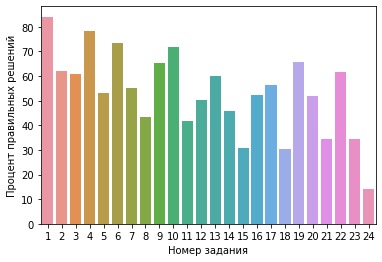

In [141]:
#Успешность всех заданий части B за 21 год
success_of_q_graf(df_21_inf,24)

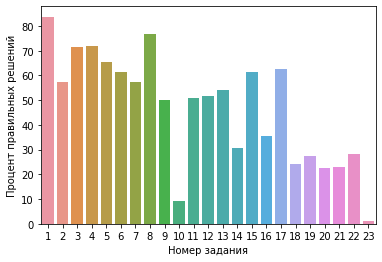

In [142]:
#Успешность всех заданий части B за 20 год
success_of_q_graf(df_20_inf,23)

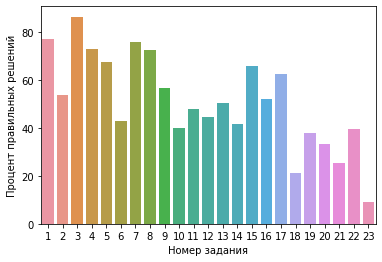

In [143]:
#Успешность всех заданий части B за 19 год
success_of_q_graf(df_19_inf,23)

15
0


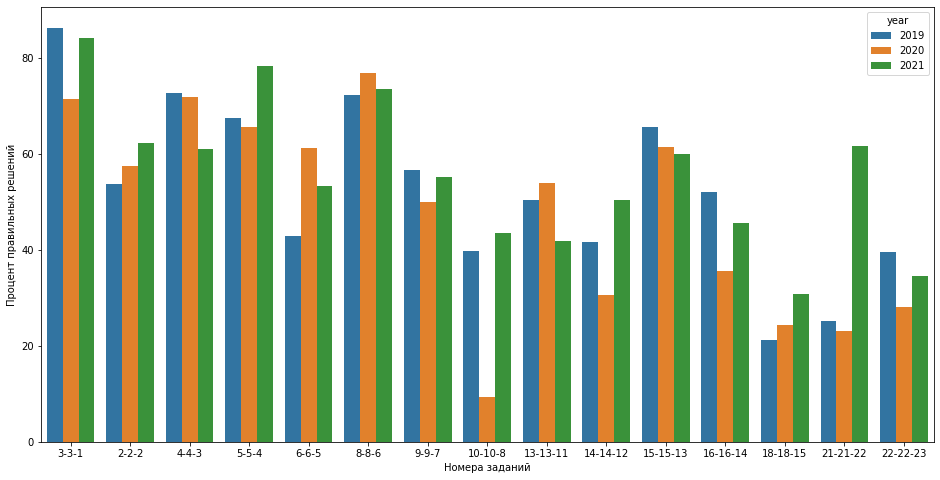

<Figure size 432x288 with 0 Axes>

In [144]:
success_of_q_graf_full_common(df_21_inf,df_20_inf,df_19_inf)

#### Рассмотрим самые сложные задания отдельно

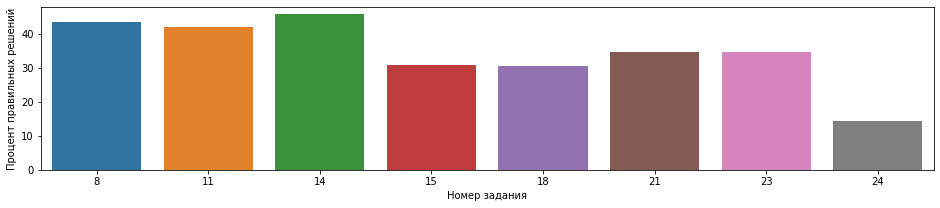

In [145]:
hard_q_graf(df_21_inf,24)

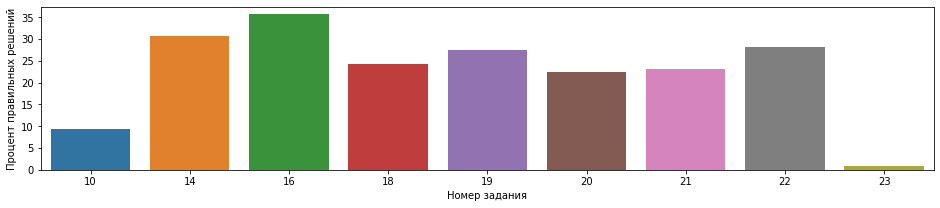

In [146]:
hard_q_graf(df_20_inf,23)

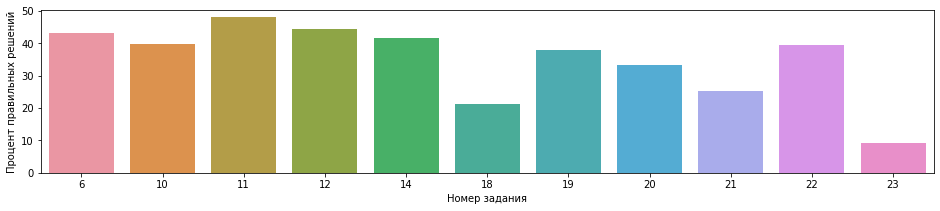

In [147]:
hard_q_graf(df_19_inf,23)

#### Выделим темы, на которых дети чаще всего ошибались

---
21:

8 -Знание о методах измерения количества информации

11 - Умение подсчитывать информационный объём сообщения

14 - Знание позиционных систем
счисления

15 - Знание основных понятий и законов математической логики

18 - Умение обрабатывать вещественные выражения в электронных таблицах

21 - Умение построить дерево игры
по заданному алгоритму и найти
выигрышную стратегию

23 - Умение анализировать результат
исполнения алгоритма

24 - Умение создавать собственные
программы (10–20 строк) для обработки символьной информации


---


20:

10 - Знание о методах измерения количества информации

14 - Умение исполнить алгоритм для конкретного исполнителя с фиксированным набором команд

16 - Знание позиционных систем счисления

18 - Знание основных понятий и законов
математической логики 

19 - Работа с массивами (заполнение, считывание, поиск, сортировка, массовые
операции и др.) 

20 -Анализ алгоритма, содержащего цикл и
ветвление

21 - Умение анализировать программу, использующую процедуры и функции

22 - Умение анализировать результат исполнения алгоритма

23 - Умение строить и преобразовывать логические выражения


---



19:

6 - Формальное исполнение алгоритма, записанного на естественном языке или
умение создавать линейный алгоритм
для формального исполнителя
с ограниченным набором команд

10 - Знание о методах измерения количества информации

11 - Умение исполнить рекурсивный алгоритм

12 - Знание базовых принципов организации и функционирования компьютерных сетей, адресации в сети

14 - Умение исполнить алгоритм для конкретного исполнителя с фиксированным набором команд

18 - Знание основных понятий и законов
математической логики

19 -Работа с массивами (заполнение, считывание, поиск, сортировка, массовые
операции и др.) 

20 - Анализ алгоритма, содержащего цикл и
ветвление


21 - Умение анализировать программу, использующую процедуры и функции

22 - Умение анализировать результат исполнения алгоритма

23 -Умение строить и преобразовывать логические выражения



### Рассмотрим решаемость всех заданий уровня С


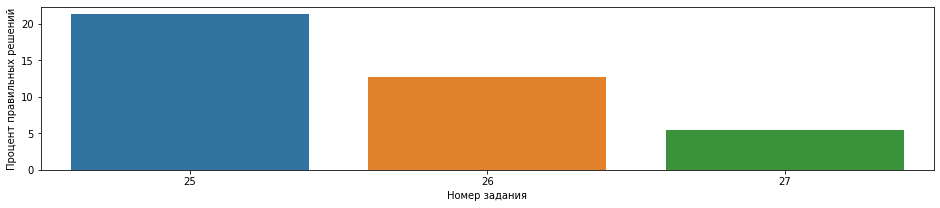

In [148]:
success_of_q_graf_c(df_21_inf,25)


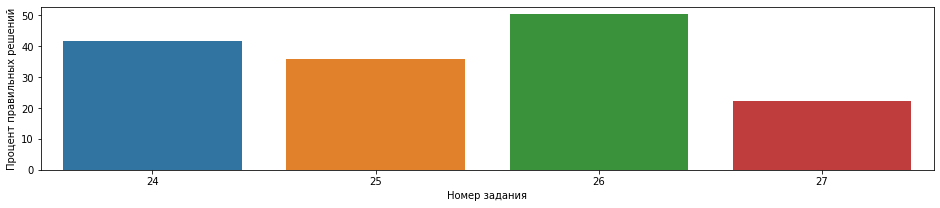

In [149]:
success_of_q_graf_c(df_20_inf,24)

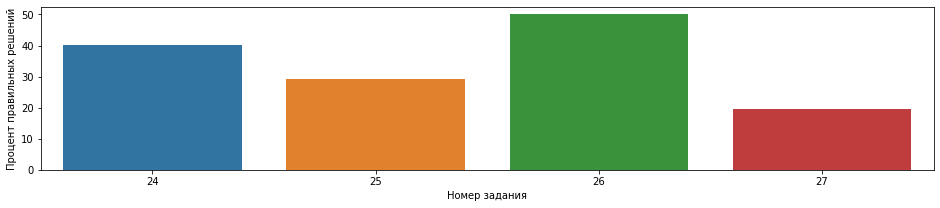

In [150]:
success_of_q_graf_c(df_19_inf,24)

#### Как мы видим, успешность выполнения заданий части С в 21 году упала почти в два раза по сравнению с 20 и 19 годами, хотя и количество задач в частях уменьшился, давайте взглянем на темы:

21 год:

25 - Умение создавать собственные
программы (10–20 строк) для обработки целочисленной информации

26 -Умение обрабатывать целочисленную информацию с использованием сортировки

27 - Умение создавать собственные
программы (20–40 строк) для
анализа числовых последовательностей

---
20 год:

24 - Умение прочесть фрагмент программы
на языке программирования и исправить допущенные ошибки

25 - Умение составить алгоритм и записать
его в виде простой программы (10–15
строк) на языке программирования

26 - Умение построить дерево игры по заданному алгоритму и обосновать выигрышную стратегию

27 - Умение создавать собственные программы (30–50 строк) для решения задач средней сложности


---

19 год:

24 - Умение прочесть фрагмент программы
на языке программирования и исправить допущенные ошибки

25 - Умение составить алгоритм и записать
его в виде простой программы (10–15
строк) на языке программирования

26 - Умение построить дерево игры по заданному алгоритму и обосновать выигрышную стратегию

27 - Умение создавать собственные программы (30–50 строк) для решения задач средней сложности





#### И если в 2021 году содержание 24 и 26 задания именились, по сравнению с 2020 и 2019 годами, то номер  25 остался таким же, а номер 27, наоборот, стал проще. 

## Рассмотрим бальные показатели за все года:

### Отсортируем наши данные по районам:

In [151]:
df_21_inf['Район'].value_counts()

г. Владикавказ            190
Моздокский район           30
Правобережный район        26
Выпускники прошлых лет     17
Негосудрственные ОО        12
Пригородный район          10
Кировский район             8
ОО  СПО                     7
Алагирский район            6
Ардонский район             5
Ирафский район              2
ОУ РЮО                      1
Вузы                        1
Name: Район, dtype: int64

In [152]:
df_20_inf['Район'].value_counts()

г. Владикавказ            185
Моздокский район           50
Правобережный район        19
Пригородный район          19
Выпускники прошлых лет     15
Алагирский район            9
Ардонский район             8
Дигорский район             4
ОО  СПО                     4
Ирафский район              3
Негосудрственные ОО         3
Кировский район             1
Name: Район, dtype: int64

In [153]:
df_19_inf['Регион'].value_counts()

г. Владикавказ            149
Моздокский район           45
Выпускники прошлых лет     25
Правобережный район        22
Пригородный район          19
Ардонский район             6
Негосудрственные ОО         6
ОО  СПО                     4
Дигорский район             3
Кировский район             3
Ирафский район              3
ОУ РЮО                      1
Name: Регион, dtype: int64

#### Рассмотрим изменения количества участников по разным годам

In [154]:
df_21_inf['Район'].value_counts() - df_20_inf['Район'].value_counts() 

Алагирский район          -3.0
Ардонский район           -3.0
Вузы                       NaN
Выпускники прошлых лет     2.0
Дигорский район            NaN
Ирафский район            -1.0
Кировский район            7.0
Моздокский район         -20.0
Негосудрственные ОО        9.0
ОО  СПО                    3.0
ОУ РЮО                     NaN
Правобережный район        7.0
Пригородный район         -9.0
г. Владикавказ             5.0
Name: Район, dtype: float64

In [155]:
df_20_inf['Район'].value_counts() - df_19_inf['Регион'].value_counts()

Алагирский район           NaN
Ардонский район            2.0
Выпускники прошлых лет   -10.0
Дигорский район            1.0
Ирафский район             0.0
Кировский район           -2.0
Моздокский район           5.0
Негосудрственные ОО       -3.0
ОО  СПО                    0.0
ОУ РЮО                     NaN
Правобережный район       -3.0
Пригородный район          0.0
г. Владикавказ            36.0
dtype: float64

С 19 на 20 год
1.  г. Владикавказ :  +36  = 185 человек
2.  Алагирский район :  -9  = 9 человек
3.  Ардонский район :  +2 = 8 человек
4.  Дигорский район :  +1 = 4 человекa
5.  Ирафский район :  0 = 3 человекa
6.  Кировский район : -2 = 1 человек
7.  Моздокский район :  +5  = 50 человек
8.  Правобережный район :  -3 = 19 человек
9.  Пригородный район :  0 = 19 человек


---


С 20 на 21 год 
1.  г. Владикавказ :  +5  = 190 человек
2.  Алагирский район :  -3  = 6 человек
3.  Ардонский район :  -3 = 5 человек
4.  Дигорский район :  -4 = 0 человек
5.  Ирафский район :  -1 = 2 человекa
6.  Кировский район : +7 = 8 человек
7.  Моздокский район :  -20  = 30 человек
8.  Правобережный район :  +7 = 26 человек
9.  Пригородный район :  -9 = 10 человек


---


Общее число учеников:

19 год = 286

20 год = 320

21 год = 315



Т.к количество учеников в разных Районах в разные годы может быть очень маленьким, разделим их на 3 Зоны: Владикавказ, Моздок, и все остальное

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MEDIAN
г. Владикавказ: 61.5
Моздокский Район: 58.0
Все остальные районы: 53.0 

MAX
г. Владикавказ: 98.0
Моздокский Район: 88.0
Все остальные районы: 90.0 

MIN
г. Владикавказ: 0.0
Моздокский Район: 0.0
Все остальные районы: 0.0


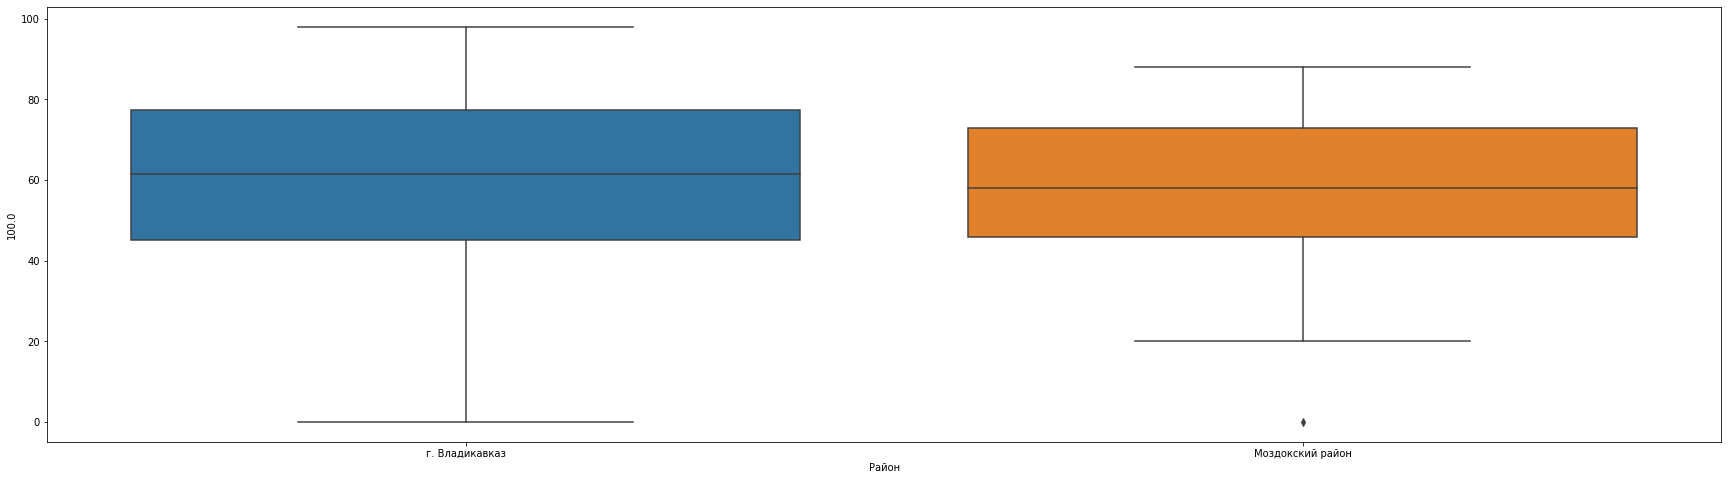

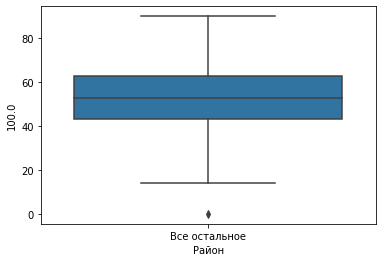

In [156]:
take_region_guys(df_21_inf,'Район')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MEDIAN
г. Владикавказ: 55.0
Моздокский Район: 60.0
Все остальные районы: 42.0 

MAX
г. Владикавказ: 100.0
Моздокский Район: 92.0
Все остальные районы: 100.0 

MIN
г. Владикавказ: 0.0
Моздокский Район: 7.0
Все остальные районы: 0.0


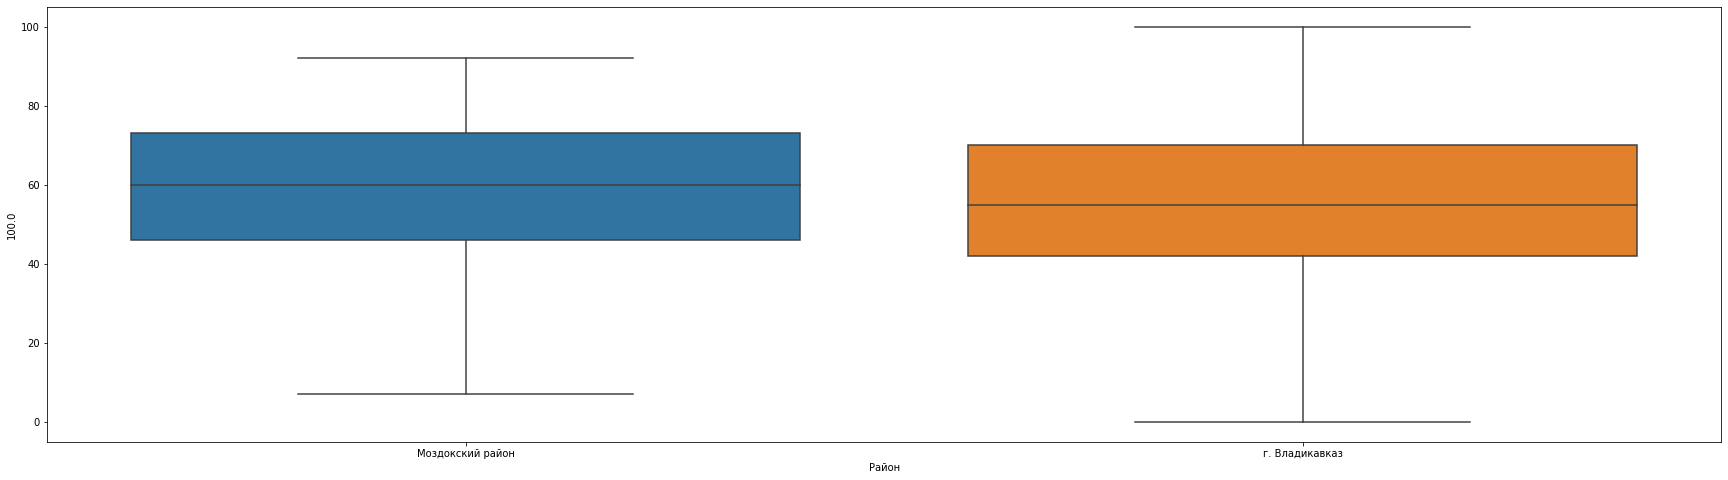

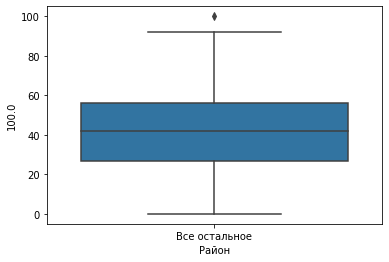

In [157]:
take_region_guys(df_20_inf,'Район')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MEDIAN
г. Владикавказ: 59.0
Моздокский Район: 51.0
Все остальные районы: 47.0 

MAX
г. Владикавказ: 100.0
Моздокский Район: 88.0
Все остальные районы: 81.0 

MIN
г. Владикавказ: 0.0
Моздокский Район: 0.0
Все остальные районы: 0.0


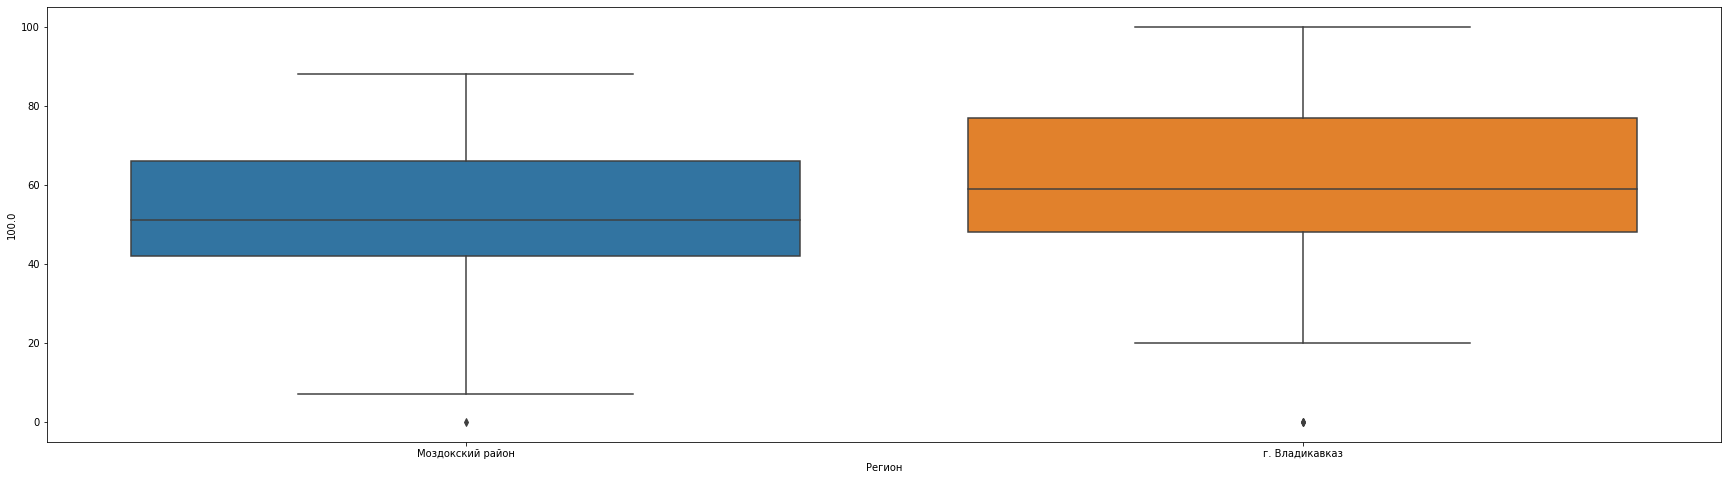

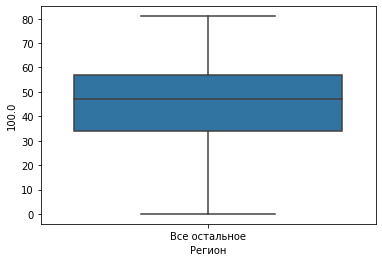

In [158]:
take_region_guys(df_19_inf,'Регион')

### Отсортируем наши данные по Школам:

Сравним средние и медианные баллы за последние три года

In [159]:
print(df_19_inf[100.0].median())
print(df_20_inf[100.0].median())
print(df_21_inf[100.0].median())


print(df_19_inf[100.0].mean())
print(df_20_inf[100.0].mean())
print(df_21_inf[100.0].mean())


53.0
53.0
58.0
53.58741258741259
52.215625
57.33968253968254


Из за малого количества данных пойдем на хитрость и будем рассматривать только школьников среди школ, ученики которых регулярно учавствуют в экзамене


Данные по кличеству сдававших экзамен школьников

In [160]:
how_much_sch(df_21_inf,df_20_inf,df_19_inf)

                          19    20    21  delta_year
г. Владикавказа           20  10.0  11.0         1.0
ГБОШИ РФМЛИ               18   5.0  23.0        18.0
МБОУ лицей г.Владикавказ  13  10.0  10.0         0.0
МБОУ СОШ №8 г.Моздок      12  13.0   5.0        -8.0
МБОУ гимназия №5          10  10.0  17.0         7.0
                                                    19    20    21  delta_year
г. Владикавказа                                     20  10.0  11.0         1.0
ГБОШИ РФМЛИ                                         18   5.0  23.0        18.0
МБОУ лицей г.Владикавказ                            13  10.0  10.0         0.0
МБОУ СОШ №8 г.Моздок                                12  13.0   5.0        -8.0
МБОУ гимназия №5                                    10  10.0  17.0         7.0
ГБОУ СОШ №8 г.Беслан                                 8   4.0   7.0         3.0
МАОУ БСОШ №7 с угл. изуч. англ. языка                8   5.0   6.0         1.0
МБОУ СОШ №30                                      

Данные по медианному значению баллов по каждой из школ

In [161]:
median_of_b(df_21_inf,df_20_inf,df_19_inf)

year                                                  19    20    21   Рост
Кратое название  ОУ                                                        
ГБОУ «Гимназия «Диалог»                             50.0  60.0  63.0   True
ГБОУ СОШ г.Беслан                                   43.0  54.0  50.0  False
ГБОУ СОШ с углубленным изучением художественно ...  37.5  67.0  60.0  False
ГБОУ СОШ № 47                                       77.0  55.0  78.0   True
ГБОУ СОШ №8 г.Беслан                                46.0  10.5  50.0   True
ГБОШИ РФМЛИ                                         64.5  62.0  78.0   True
МАОУ БСОШ №7 с угл. изуч. англ. языка               59.0  70.0  65.5  False
МБОУ ВСОШ №2                                        20.0  36.5  48.0   True
МБОУ СОМШ №44                                       80.0  61.0  47.5  False
МБОУ СОШ с.Ир                                       57.0  42.0  68.0   True
МБОУ СОШ с.Михайловское                             47.0  34.0  55.5   True
МБОУ СОШ с.Т

Как мы видим в большинстве школ произошел рост баллов, что не может не радовать

### Изучим зависимость между датой сдачи(основной день и резервный день) и количеством баллов

In [162]:
df_21_inf['Дата'].value_counts()

2021-06-24    173
2021-06-25    133
2021-07-02      8
2021-07-14      1
Name: Дата, dtype: int64

In [163]:
df_20_inf['Дата'].value_counts()

2020-07-03    308
2020-07-24      9
2020-07-25      3
Name: Дата, dtype: int64

In [164]:
df_19_inf['Дата'].value_counts()

2019-06-13    256
2019-06-20     25
2019-04-03      3
2019-07-01      2
Name: Дата, dtype: int64

Медиана основного 58.0
Медиана Резерв 58.0
Среднее основного 57.66013071895425
Среднее Резерв 46.44444444444444
Дисперсия основного 436.01525768777424
Дисперсия Резерв 1188.5277777777776
Среднее отклонение основного 20.880978369984827
Среднее отклонение Резерв 34.475031222288656


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


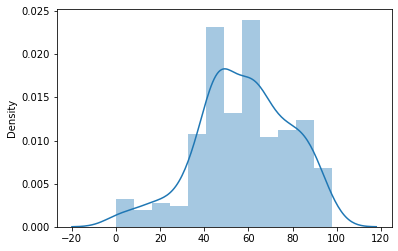

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


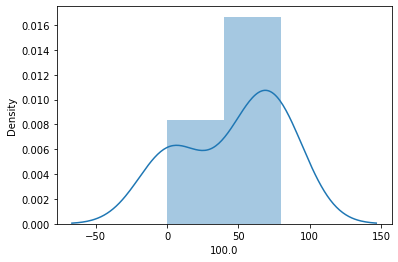

In [165]:
days_info(df_21_inf,'2021-06-24','2021-06-25')

Медиана основного 53.0
Медиана Резерв 68.0
Среднее основного 51.76948051948052
Среднее Резерв 63.666666666666664
Дисперсия основного 451.2463619442439
Дисперсия Резерв 1093.8787878787878
Среднее отклонение основного 21.242560155128288
Среднее отклонение Резерв 33.07383842070327


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


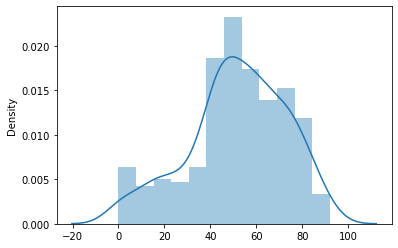

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


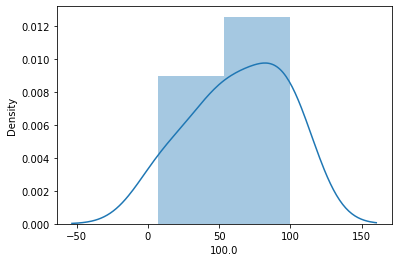

In [166]:
days_info(df_20_inf,'2020-07-03')

Медиана основного 55.0
Медиана Резерв 44.0
Среднее основного 54.72265625
Среднее Резерв 43.9
Дисперсия основного 475.4561121323529
Дисперсия Резерв 622.0241379310346
Среднее отклонение основного 21.804956136905044
Среднее отклонение Резерв 24.940411743414234


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


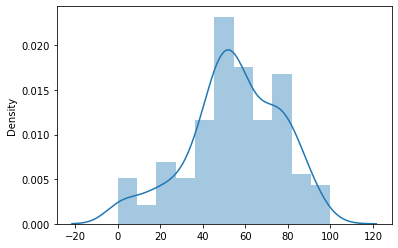

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


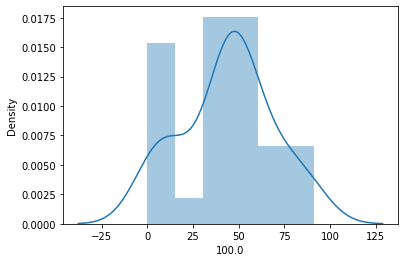

In [167]:
days_info(df_19_inf,'2019-06-13')

Ничего интересного тут нет, данные не выглядят нормально распределенными, а медианы очень близки друг к другу

# Выводы

### Общие выводы и рекомендации по заданиям уровня B
**Учителям особенно стоит обратить внимание / увеличить количество уроков на следующие темы:**

1.   Знание о методах измерения количества информации
2.   Умение анализировать результат исполнения алгоритма
3.   Знание основных понятий и законов математической логики

**Именно эти темы дети усваивают хуже остальных**










### Общие выводы и рекомендации по заданиям уровня С

В 21 году по сравнению с 20 годым, дети стали программировать слабее намного слабее:

Умение писать легкие программы(25 номер) упало на 15% (с 35% до 20).

Умение писать программы среднего уровня упало на 18% (с 23% до 5%).


---



Когда как в 20 году наоборот произошел рост:

Умение писать легкие программы(25 номер) выросло на 8% (с 27% до 35).

Умение писать программы среднего уровня выросло на 3% (с 20% до 23%) по сравнению, с 20 годом.



---



**Поэтому в связи с этим, учителям особенно стоит обратить внимание / увеличить количество уроков на обучение детей программированию.**




### Общие выводы и рекомендации по количествам учеников:
**Всем регионам кроме: Кировского районa, г. Владикавказ и Правобережного района, следует повысить привлекательность информатики и программирования в целом. Особенно Моздоксому району**

### Общие выводы и рекомендации по регионам:
Всем регионам кроме: Кировского районa, г. Владикавказ и Правобережного района, следует повысить привлекательность информатики и программирования в целом.

Также на boxplot графиках видно, что медианный бал по каждой из зон в 21 году вырос, по сравнению с 19 годом:

1.   г. Владикавказ: +2.5
2.   Моздокский Район: +7
3.  Все остальные районы: +6

В 21 году г.Владикавказ все также обгоняет остальные Зоны по медианному баллу,однако следует отметить, что разрыв между Владикавказом и Моздокским районом значительно сократился по сравнению с 19 годом (с 8 до 3.5 баллов):

1. г. Владикавказ: 61.5
2. Моздкоский Район: 58.0
3. Все остальные районы: 53.0

Удивление вызывает медианный бал Маздокского района за 21 год, т.к по сравнению с 20 годом, если во всех остальных зонах, было замечен рост баллов, что логично исходя из выхода из ковидной ситуации, то в Маздокском районе, все было наоборот, уровень упал на 5 пунктов, когда как количество сдающих также упало на 20 человек. Вероятно это связано, с изменением регламента и тем, что местыные учителя не сумели перестроится также эффективно, как сделали это учителя других Зон


Также на boxplot графиках видно, изменения максимального бал по каждой из зон:

1.   г. Владикавказ: -2
2.   Моздокский Район: 0
3.  Все остальные районы: +9

По максимальному значению Владикавказ обгоняет Моздокский район и все остальные на 10 и 8 баллов, соответсвенно.

1. г. Владикавказ: 98.0
2. Моздкоский Район: 88.0
3. Все остальные районы: 90.0


**Следует обратить особое внимание, на падение уровня подготовки сдающих из Моздоксого района, а также на все еще сильное отставание Всех остальных районов от г.Владкиавказ**




### Общие выводы по школам:
Всем регионам кроме: Кировского районa, г. Владикавказ и Правобережного района, следует повысить привлекательность информатики и программирования в целом.



---

Рост среднего и медианного количества баллов, в целом по годам, и в целом по большинству школ, как я считаю является следствием роста  уровеня подготовки детей, растущий из года в год в большинстве районов Республики, а также следствием выхода из ковидного сезона.



---

**Также большинству школ следует обратить вниманеи на падение количества сдающих этот экзамен детей**


